# Exercise sheet 4
---
**Machine Learning for Physics and Astronomy**

Semester 2, Period 5, 2021/2022

dr. Christoph Weniger, Andrea Visibile, Christiaan van Asperen, Dion Noordhuis, Kamile Lukosiute, Mathis Gerdes, Noemi Anau Montel, Silvia Cassanelli

To be handed in until **11/05/2022** - 15 points in total

---



## Chapter 7: Clustering 


### A. K-Means and EM (9pt)

*Topics: clustering, unsupervised learning*

**Reading Material: Murphy 11.4, and especially 11.4.2 and especially especially 11.4.2.5**

In this exercise, we will be implementing the K-means clustering algorithm by hand. Although efficient algorithms (that you should definitely use for your own projects!) are implemented in `scikit-learn`, sometimes it's helpful to see how things work by writing your own implementation.

We will work with some previously generated data. 


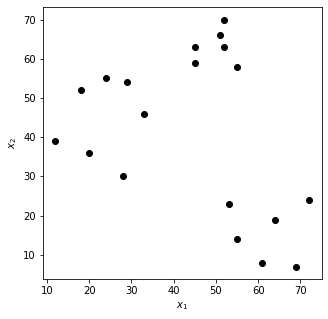

[12 20 28 18 29 33 24 45 45 52 51 52 55 53 55 61 64 69 72]
[39 36 30 52 54 46 55 59 63 70 66 63 58 23 14  8 19  7 24]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Some previously geenerated random data in 2 dimensions
data = np.array([ [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
     [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]]).T
x1 = data[:,0]
x2 = data[:,1]
fig = plt.figure(figsize=(5, 5))
plt.scatter(data[:,0], data[:,1], color='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

print(x1)
print(x2)

1. Take a look at the plot of our datapoints. Generate initial random values for the centroids (means) such that they are randomly distributed throughout the whole data space. Use $k=3$. Your centroids should be stored as a $k \times 2$ numpy arrays, with each row giving the $x_1, x_2$ values of the centroid. Plot a scatter plot of the data along with your centroids in red, green, and blue. (2pt)

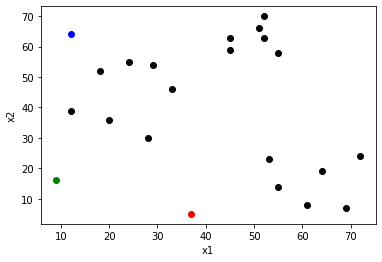

In [3]:

np.random.seed(1)
def gen_centroids(data_file, k):
  x1_samples = np.random.randint(0 , np.max(data_file) , size = k)
  x2_samples = np.random.randint(0 , np.max(data_file) , size = k)

  # Create the kx2 array with eacht row value x1 and x2
  centroids = np.array(list(zip(x1_samples,x2_samples)))
  return centroids
  
centroids_plot1 = gen_centroids(data, k=3)
plt.scatter(data[:,0], data[:,1], color='black')

plt.xlabel('x1')
plt.ylabel(r'x2')
plt.scatter(centroids_plot1[0,0],centroids_plot1[0,1],color='red')
plt.scatter(centroids_plot1[1,0],centroids_plot1[1,1], color='blue')
plt.scatter(centroids_plot1[2,0],centroids_plot1[2,1], color='green')


2. (Assignment/Expectation) Define the function `closest_centroid`, which should return an array giving the index (0, 1, or 2) of the closest centroid for each datapoint. This function will tell us which centroid is closest. This function plays the same role as 

$$r_{n k}=\left\{\begin{array}{ll}
1 & \text { if } k=\arg \min _{j}\left\|\mathbf{x}_{n}-\boldsymbol{\mu}_{j}\right\|^{2} , \\
0 & \text { otherwise } .
\end{array}\right.$$

(although returning directly $k$, not the one-hot encoding).

Hint: `np.argmin` could be useful here. (2pt)



In [4]:
def closest_centroid(k, data_file, centroids):
    closest_arr = np.zeros(len(data_file))
    for i in range(len(data_file)):
      r_nk= np.zeros(k)
      # For every data point calculate r_nk and check which one is closest
      for j in range(k):
        r_nk[j] = np.sum((data_file[i,:] - centroids[j,:]) ** 2)
        # print(r_nk[j]) 
        closest_arr[i] = np.argmin(r_nk)
    return closest_arr

# centroids_plot1 = gen_centroids(data, K)
# closest_arr = closest_centroid(K,data,centroids_plot1)
# print(closest_arr)
# print(data)

3. (Moving Centroids/Maximization) Define the function `move_centroids` which should return the new values of the means i.e. centroids, given the previous assignments. This function is equivalent to
$$\boldsymbol{\mu}_{k}=\frac{\sum_{n} r_{n k} \mathbf{x}_{n}}{\sum_{n} r_{n k}}.$$ (1pt)

In [8]:
def move_centroids(x, y, closest,data_file, k):
  intervals_0_x1 =[]
  intervals_1_x1=[]
  intervals_2_x1=[]
  intervals_0_x2 =[]
  intervals_1_x2=[]
  intervals_2_x2=[]
  mean_x1 = []
  mean_x2 = []

  for j in range(len(data_file)):
    if closest[j] == 0:
      intervals_0_x1.append(x[j])
      intervals_0_x2.append(y[j])
    elif closest[j] == 1:
      intervals_1_x1.append(x[j])
      intervals_1_x2.append(y[j])
    else:
      intervals_2_x1.append(x[j])
      intervals_2_x2.append(y[j])

  intervals_0 =np.array(list(zip(intervals_0_x1,intervals_0_x2)))
  intervals_1 = np.array(list(zip(intervals_1_x1,intervals_1_x2)))
  intervals_2 = np.array(list(zip(intervals_2_x1,intervals_2_x2)))
  
  mean_x1.append(round(np.mean(intervals_0_x1)))
  print(np.mean(intervals_0_x1))
  mean_x1.append(round(np.mean(intervals_1_x1)))
  print(np.mean(intervals_1_x1))
  mean_x1.append(round(np.mean(intervals_2_x1)))

  mean_x2.append(round(np.mean(intervals_0_x2)))
  mean_x2.append(round(np.mean(intervals_1_x2)))
  mean_x2.append(round(np.mean(intervals_2_x2)))

  new_centroids = np.array(list(zip(mean_x1,mean_x2)))
  return intervals_0,intervals_1,intervals_2, new_centroids


4. (Iteration) Now we are ready to put our E and M steps together. Decide on a termination criterion, and run your training. This should be only a few steps. At each training step, visualize the assignments of the data points to their respective centroid in plots. (2pt)

In [10]:

def k_means(x, y, data_file, k):
    cs = gen_centroids(data_file,k)
    # closest_array = closest_centroid(k, data_file, cs)
    # old_closest_array = []
    # int0,int1,int2,new_cs = move_centroids(x, y,closest_array,data_file,k)
    
    max_tries = 10
    count = 0
    # print("New centroids before loop: ", new_cs, "\n")
    # print("Old centroids before loop: ", cs, "\n")
    old_array = []
    
    while (True):
      count+=1
      max_tries-=1

      print("While loopin old cs: ", cs, "\n")

      closest_array = closest_centroid(k, data_file, cs)
      int0, int1, int2, new_cs = move_centroids(x, y, closest_array, data_file, k)
      print("while loopin new cs:" , new_cs)
           
      difference = np.linalg.norm(cs-new_cs)
      print("Difference", difference)
      cs=new_cs

      # plt.title("Assignments of datapoints after attemp " +  str(count))
      # plt.scatter(int0[:,0], int0[:,1],c= "red")
      # plt.scatter(int1[:,0],int1[:,1], c ='blue')
      # plt.scatter(int2[:,0],int2[:,1],c ="green")
      # plt.scatter(new_cs[0,0],new_cs[0,1],marker= '+',color='black')
      # plt.scatter(new_cs[1,0],new_cs[1,1],marker= '+',color='black')
      # plt.scatter(new_cs[2,0],new_cs[2,1],marker= '+',color='black')
      # plt.plot()

      if difference == 0 or max_tries == 0:
        print("Stop")
        break
    
    # print("New centroids after loop: ", new_cs, "\n")
    # print("Old centroids after loop: ", cs, "\n")
    # print("count:", count)
    return 0  


k_means4 = k_means(x1, x2, data, 3)



While loopin old cs:  [[22  0]
 [57 60]
 [ 1  8]] 

53.25
45.61538461538461
while loopin new cs: [[53 15]
 [46 50]
 [16 38]]
Difference 50.3189825016365
While loopin old cs:  [[53 15]
 [46 50]
 [16 38]] 

62.333333333333336
45.25
while loopin new cs: [[62 16]
 [45 60]
 [20 42]]
Difference 14.66287829861518
While loopin old cs:  [[62 16]
 [45 60]
 [20 42]] 

62.333333333333336
50.0
while loopin new cs: [[62 16]
 [50 63]
 [23 45]]
Difference 7.211102550927978
While loopin old cs:  [[62 16]
 [50 63]
 [23 45]] 

62.333333333333336
50.0
while loopin new cs: [[62 16]
 [50 63]
 [23 45]]
Difference 0.0
Stop


In [ ]:


# plt.scatter(intervals_0[:,0],intervals_0[:,1], c='r', label = "clusterd data")
# plt.scatter(intervals_1[:,0],intervals_1[:,1], c='g',label = "clusterd data")
# plt.scatter(intervals_2[:,0],intervals_2[:,1], c='blue',label = "clusterd data")
# plt.scatter(new_centroids[:, 0], new_centroids[:, 1], label = "centroids",marker= '+',color='black')
# plt.title('K-means Clustering with 3 Centroids')
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.legend()

5. Discuss briefly when the algorithm does or does not converge. (1 pt)

Your answer here

6. Now load the data below and run your K-means algorithm again for $k=3$. Do you obtain good results? How would a method using Gaussian mixture models perform differently? (1 pt)

In [ ]:
!wget https://raw.githubusercontent.com/ChristiaanvA/ml4pha_datasets/main/data_mouse.csv

In [ ]:
data_mouse = pd.read_csv('/content/data_mouse.csv')
data_mouse = data_mouse.to_numpy()

fig = plt.figure(figsize=(5, 5))
plt.scatter(data_mouse[:,0], data_mouse[:,1], color='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

In [ ]:
#Your code here

Your answer here